   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

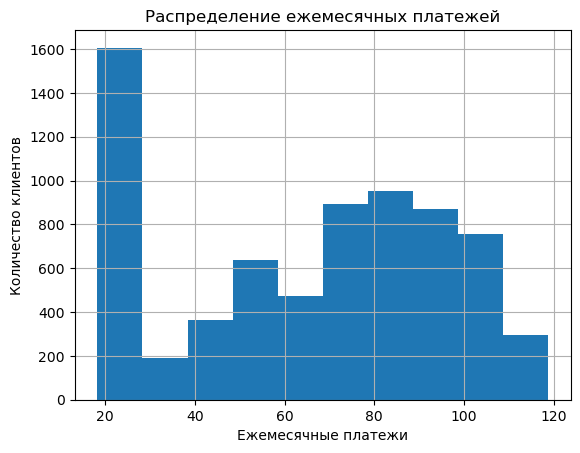

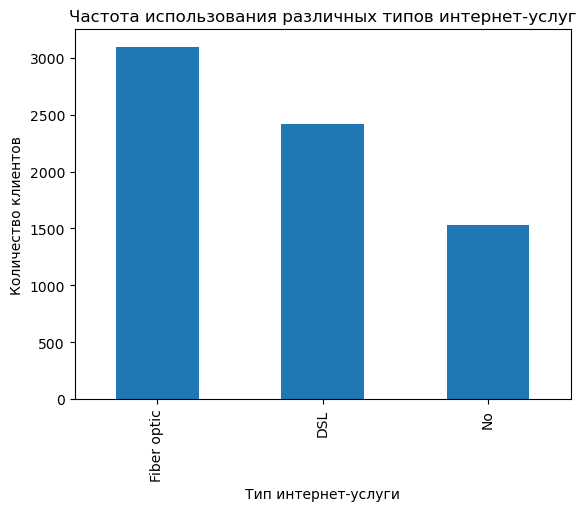

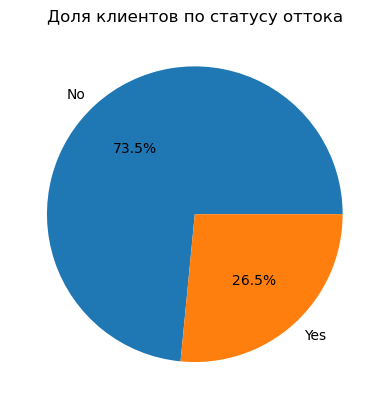

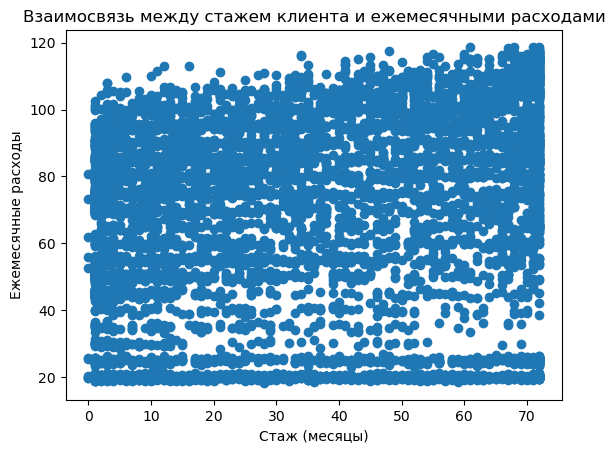

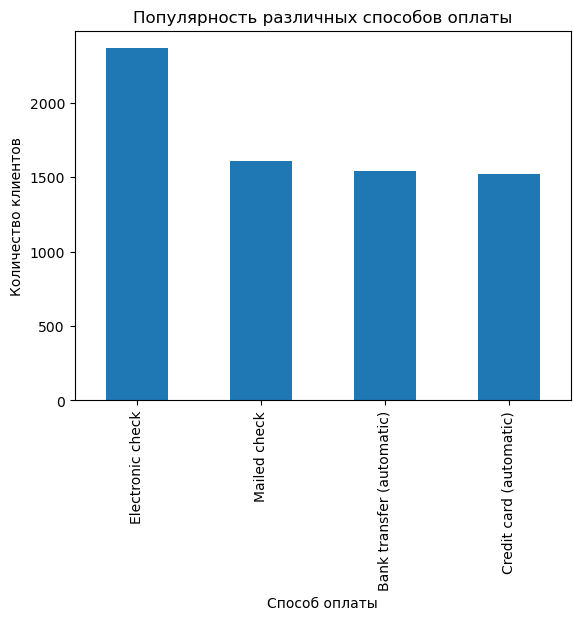

In [15]:
## Дисциплина Современные методы анализа данных
## Тема Итоговое задание по дисциплине

# Импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt


# Этап 1. Загрузка данных
data = pd.read_csv('D:/Itogovoe.csv')

# Этап 2. Исследовательский анализ данных (EDA).

# Просмотр первых нескольких строк данных для понимания структуры данных
print(data.head())

# Генерация сводной статистики для набора данных
print(data.describe())

# Создание гистограммы для MonthlyCharges
import matplotlib.pyplot as plt

data['MonthlyCharges'].hist()
plt.title('Распределение ежемесячных платежей')
plt.xlabel('Ежемесячные платежи')
plt.ylabel('Количество клиентов')
plt.show()

# Создание столбчатой диаграммы для InternetService
data['InternetService'].value_counts().plot(kind='bar')
plt.title('Частота использования различных типов интернет-услуг')
plt.xlabel('Тип интернет-услуги')
plt.ylabel('Количество клиентов')
plt.show()

# Создание круговой диаграммы для Churn
data['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Доля клиентов по статусу оттока')
plt.ylabel('')
plt.show()

# Создание точечной диаграммы для изучения взаимосвязи между tenure и MonthlyCharges
plt.scatter(data['tenure'], data['MonthlyCharges'])
plt.title('Взаимосвязь между стажем клиента и ежемесячными расходами')
plt.xlabel('Стаж (месяцы)')
plt.ylabel('Ежемесячные расходы')
plt.show()

# Создание графика количества для PaymentMethod
data['PaymentMethod'].value_counts().plot(kind='bar')
plt.title('Популярность различных способов оплаты')
plt.xlabel('Способ оплаты')
plt.ylabel('Количество клиентов')
plt.show()


# 2.4 Выводы по визуализациям:

1. Распределение ежемесячных расходов среди клиентов:
   большинство клиентов платят $20 в месяц за свои услуги. Это видно из гистограммы, где основная масса данных находится в этом диапазоне.

2. Частота использования различных типов интернет-услуг:
   наибольшее количество клиентов используют DSL и Fiber optic. Число клиентов без интернет-услуг минимально. Это показано на столбчатой диаграмме, где видно преобладание этих двух категорий.

3. Доля клиентов по статусу оттока:
   26.5% клиентов прекратили свои подписки. Это видно из круговой диаграммы, где показано соотношение ушедших и оставшихся клиентов.

4. Взаимосвязь между стажем клиента и ежемесячными расходами:
   существует положительная корреляция между стажем клиента и его ежемесячными расходами. Клиенты с большим стажем склонны тратить больше. Это видно из точечной диаграммы, где наблюдается тенденция увеличения расходов с увеличением стажа.

5. Популярность различных способов оплаты:
   электронные чеки - самый популярный способ оплаты среди клиентов. Это показано на графике количества для PaymentMethod, где видно, что этот способ оплаты имеет наибольшее количество пользователей.

In [6]:
# Этап 3. Очистка данных.

# Преобразование колонки TotalCharges из типа "объект" в числовой тип
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Заполнение пропусков в колонке TotalCharges медианным значением
median_total_charges = data['TotalCharges'].median()
data['TotalCharges'].fillna(median_total_charges, inplace=True)

# Проверка результатов
print(data['TotalCharges'].describe())


count    7043.000000
mean     2281.916928
std      2265.270398
min        18.800000
25%       402.225000
50%      1397.475000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64


In [7]:
# Этап 4. Нормализация данных в колонках с помощью масштабирования по минимуму и максимуму, сведение данных к значениям от 0 до 1.

from sklearn.preprocessing import MinMaxScaler

# Создание экземпляра MinMaxScaler
scaler = MinMaxScaler()

# Колонки для нормализации
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Применение масштабирования к данным
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Проверка результатов
print(data[columns_to_scale].describe())


            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean      0.449599        0.462803      0.261149
std       0.341104        0.299403      0.261397
min       0.000000        0.000000      0.000000
25%       0.125000        0.171642      0.044245
50%       0.402778        0.518408      0.159090
75%       0.763889        0.712438      0.434780
max       1.000000        1.000000      1.000000


In [8]:
# Этап 5. Кодирование признаков.

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Определение категориальных переменных, исключая 'customerID'
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('customerID')

# Инициализация OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first') 

# Преобразование категориальных переменных, исключая 'customerID'
encoded_data = encoder.fit_transform(data[categorical_columns])

# Преобразование в DataFrame и вывод первых строк
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
print(encoded_df.head())



   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0          0.0          1.0             0.0               0.0   
1          1.0          0.0             0.0               1.0   
2          1.0          0.0             0.0               1.0   
3          1.0          0.0             0.0               0.0   
4          0.0          0.0             0.0               1.0   

   MultipleLines_No phone service  MultipleLines_Yes  \
0                             1.0                0.0   
1                             0.0                0.0   
2                             0.0                0.0   
3                             1.0                0.0   
4                             0.0                0.0   

   InternetService_Fiber optic  InternetService_No  \
0                          0.0                 0.0   
1                          0.0                 0.0   
2                          0.0                 0.0   
3                          0.0                 0.0   
4 

Accuracy: 0.7879791765262659
Precision: 0.63125
Recall: 0.5278745644599303
F1 : 0.5749525616698292


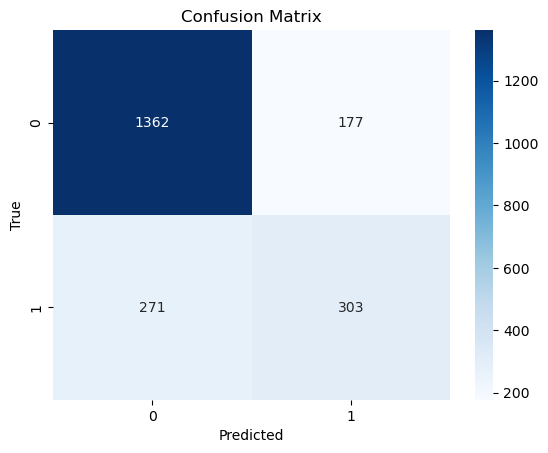

In [10]:
# Этап 6. Модель логистической регрессии для прогнозирования оттока клиентов.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Признаки и целевая переменная
X = encoded_df.drop('Churn_Yes', axis=1)
y = encoded_df['Churn_Yes']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели логистической регрессии
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Оценка производительности
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 : {f1}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


На основе предоставленных результатов модели логистической регрессии и матрицы ошибок, можно сделать следующие выводы о производительности модели:

1. Accuracy (Точность): Значение точности составляет примерно 0.798, что означает, что модель правильно предсказывает отток клиентов в 79,8% случаев. Это хороший показатель общей способности модели к правильному классифицированию.

2. Precision (Точность предсказаний): Показатель точности для класса, предсказывающего отток (1), составляет 0.631. Это означает, что когда модель предсказывает отток клиента, она правильна в 63,1% случаев.

3. Recall (Полнота): Полнота для класса оттока составляет около 0.528. Это указывает на то, что модель улавливает примерно 52,8% всех фактических случаев оттока. Низкий уровень полноты может быть проблематичным, если важно максимально идентифицировать всех клиентов, которые могут уйти.

4. F1 : Среднее гармоническое точности и полноты составляет примерно 0.575. F1 мера дает более сбалансированное представление о качестве модели, особенно в случаях, когда классы несбалансированы. Значение F1 указывает на то, что модель действительно имеет место для улучшения, особенно в улучшении полноты.

5. Матрица ошибок: Иp матрицы ошибок видно, что:
   - Истинно-отрицательных результатов (True Negative, TN) 1362 - модель правильно предсказала, что клиенты не уйдут.
   - Ложно-положительных результатов (False Positive, FP) 177 - модель неверно предсказала отток.
   - Ложно-отрицательных результатов (False Negative, FN) 271 - модель не смогла обнаружить фактический отток.
   - Истинно-положительных результатов (True Positive, TP) 303 - модель правильно идентифицировала отток клиентов.

Заключение:
Модель имеет довольно высокую общую точность, но страдает от относительно низкой полноты и F1-меры. Это может означать, что модель не очень хорошо справляется с выявлением всех потенциальных случаев оттока клиентов, что может быть критически важно для бизнеса. Возможно, стоит рассмотреть использование других подходов или дополнительных признаков для улучшения способности модели предсказывать отток.

In [14]:
# Этап 7. Модель для прогнозирования общих затрат с помощью линейной регрессии.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Обучение модели линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  

# Прогнозирование на тестовых данных
y_pred_lr = linear_model.predict(X_test)

# Оценка производительности модели
r2 = r2_score(y_test, y_pred_lr)
rmse = mean_squared_error(y_test, y_pred_lr, squared=False)  

print(f"R^2: {r2}")
print(f"RMSE: {rmse}")


R^2: 0.27298876051332754
RMSE: 0.3792681048708407


Коэффициент детерминации составляет приблизительно 0.273. Этот показатель говорит о том, что примерно 27.3% изменчивости TotalCharges можно объяснить с помощью независимых переменных в модели. Это относительно низкое значение, что указывает на ограниченную эффективность модели в объяснении изменений в зависимой переменной.
Среднеквадратичная ошибка равна 0.379. Этот показатель измеряет среднее отклонение прогнозируемых значений от фактических. Низкое значение RMSE указывает на то, что ошибки прогнозирования модели малы в среднем, что является положительным аспектом.
Вывод о качестве модели:
Модель линейной регрессии показала себя не слишком эффективно в объяснении полной вариабельности TotalCharges, с коэффициентом детерминации всего в 27.3%. Это означает, что модель не смогла захватить множество факторов, которые потенциально влияют на общие затраты клиентов. Однако низкое значение RMSE говорит о том, что ошибка в предсказаниях модели относительно мала, что является положительным моментом.

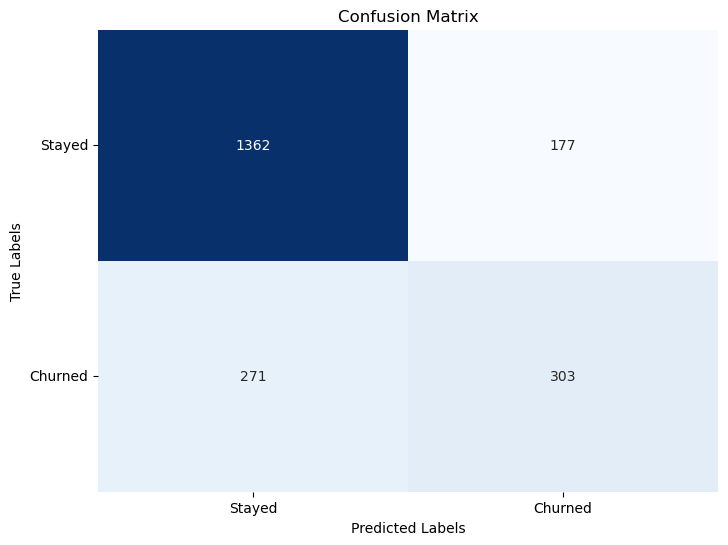

In [13]:
# Этап 8. Результаты модели.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Создание тепловой карты для матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)  # fmt='d' для отображения целочисленных значений
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks([0.5, 1.5], ['Stayed', 'Churned'])  # Настройка меток классов для X
plt.yticks([0.5, 1.5], ['Stayed', 'Churned'], rotation=0)  # Настройка меток классов для Y
plt.show()


Истинно-отрицательных результатов (True Negative, TN) 1362 - модель правильно предсказала, что клиенты не уйдут.
Ложно-положительных результатов (False Positive, FP) 177 - модель неверно предсказала отток.
Ложно-отрицательных результатов (False Negative, FN) 271 - модель не смогла обнаружить фактический отток.
Истинно-положительных результатов (True Positive, TP) 303 - модель правильно идентифицировала отток клиентов.

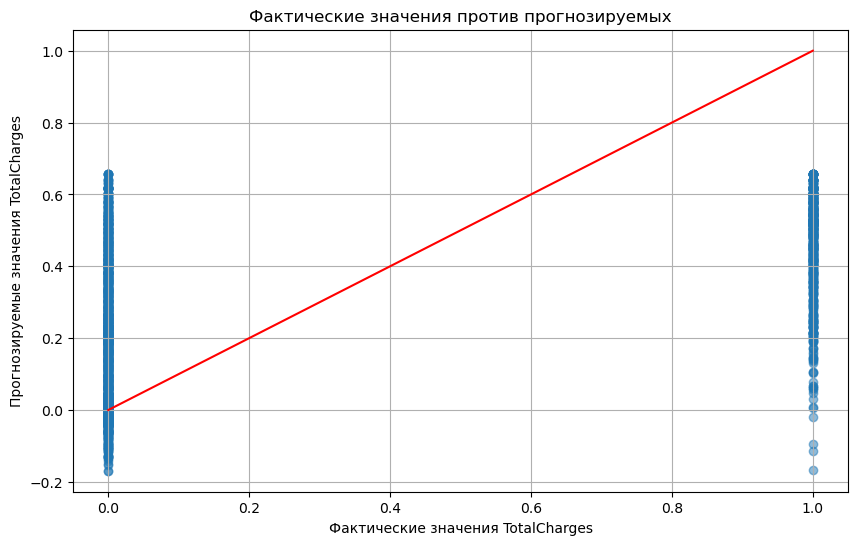

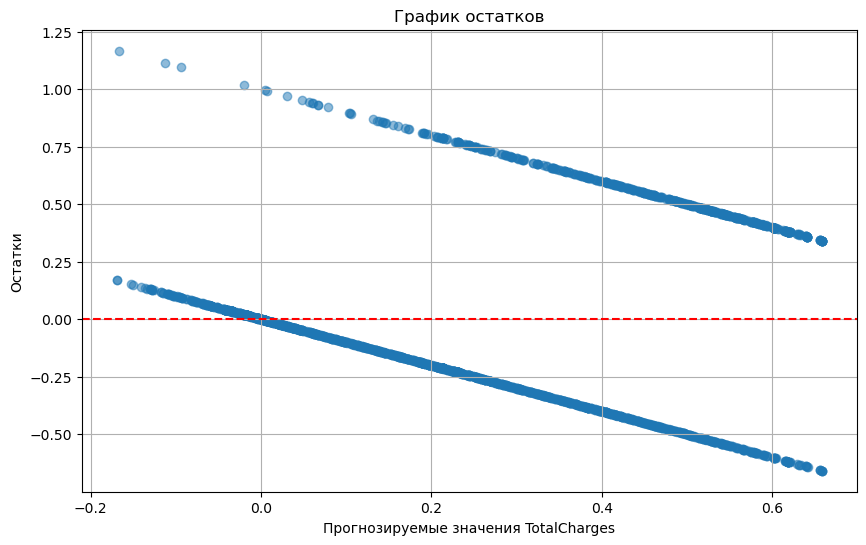

In [12]:
# 8.2. График фактических значений против прогнозируемых и график residuals для оценки точности модели и наличия закономерностей в остатках. 

import matplotlib.pyplot as plt

# 1. График фактических значений против прогнозируемых
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.title('Фактические значения против прогнозируемых')
plt.xlabel('Фактические значения TotalCharges')
plt.ylabel('Прогнозируемые значения TotalCharges')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Линия идеального прогноза
plt.grid(True)
plt.show()

# 2. График остатков (Residual Plot)
residuals = y_test - y_pred_lr

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, residuals, alpha=0.5)
plt.title('График остатков')
plt.xlabel('Прогнозируемые значения TotalCharges')
plt.ylabel('Остатки')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

